In [1]:
#mapping some polygons - Jan 24-2021 - Sunday
import pandas as pd
import geopandas as gpd
from shapely.geometry.polygon import Polygon
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import cm
import folium
import numpy as np
%matplotlib inline

In [2]:
#dataframes for csv files
dfbuffer = pd.read_csv('/home/pchilton/VT-JamesRiver/csv data/bufferlatlongV2.csv', delimiter = ',').astype(float)
#going to leave the HURDAT data out of this portion, I'm making polygons here.
#dfhurdat = pd.read_csv('/home/pchilton/work/CSVDATA/hurdatlatlong.csv', delimiter = ',').astype(float)
dfcoast = pd.read_csv('/home/pchilton/VT-JamesRiver/csv data/coastlatlongV2.csv', delimiter = ',').astype(float)
dfbasin = pd.read_csv('/home/pchilton/VT-JamesRiver/csv data/jamesbasinlatlongV2.csv', delimiter = ',').astype(float)

In [3]:
#create the polygons
buffer_geom =Polygon(zip(dfbuffer['Lon'],dfbuffer['Lat']))
basin_geom = Polygon(zip(dfbasin['Lon'],dfbasin['Lat']))
crs = {'init' : 'epsg:4326'}
bufferpoly = gpd.GeoDataFrame(index = [0], crs = crs, geometry = [buffer_geom])
bufferpoly.to_file(filename = 'buffer.geojson', driver = 'GeoJSON')
basinpoly = gpd.GeoDataFrame(index = [0], crs = crs, geometry = [basin_geom])
basinpoly.to_file(filename = 'basin.geojson', driver = 'GeoJSON')


/home/pchilton/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [4]:
# mapping in Folium
m = folium.Map([37.4, -78.7],zoom_start = 7, tiles = 'Stamen Terrain')
folium.GeoJson(bufferpoly).add_to(m)
folium.GeoJson(basinpoly).add_to(m)
folium.LatLngPopup().add_to(m)
m

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

def bufferdata():
    """returns the lons and lats from the data produced in GIS"""
    bufferlon = dfbuffer['Lon']
    bufferlat = dfbuffer['Lat']
    return bufferlon, bufferlat
def main():
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1], projection = ccrs.LambertConformal(),frameon = False)
    ax.patch.set_visible(False)
    ax.set_extent([-88, -70, 35, 40], projection = ccrs.Geodedic())
    shapename = 
    

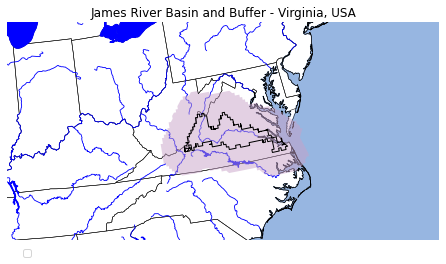

In [48]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


def basincoords():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for James River Basin 

    """
    basinlon = dfbasin['Lon']
    basinlat = dfbasin['Lat']

    return basinlon, basinlat

def buffercoords():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for James River Basin 

    """
    bufferlon = dfbuffer['Lon']
    bufferlat = dfbuffer['Lat']

    return bufferlon, bufferlat


def main():
    fig = plt.figure()
    # to get the effect of having just the states without a map "background"
    # turn off the background patch and axes frame
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),
                      frameon=False)
    ax.patch.set_visible(False)

    ax.set_extent([-88, -70, 35, 40], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_lakes_shp'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)

    bufferlon, bufferlat = buffercoords()
    basinlon, basinlat = basincoords()

    ax.set_title('James River Basin and Buffer - Virginia, USA')

    # turn the lons and lats into a shapely LineString
    buffer = sgeom.LineString(zip(bufferlon, bufferlat))
    basin = sgeom.LineString(zip(basinlon, basinlat))

    # buffer the linestring by two degrees (note: this is a non-physical
    # distance)
    #track_buffer = track.buffer(2)

    #def colorize_state(geometry):
    #    facecolor = (0.9375, 0.9375, 0.859375)
    #    if geometry.intersects(buffer):
    #        facecolor = 'red'
    #    elif geometry.intersects(basin):
    #       facecolor = '#FF7E00'
    #   return {'facecolor': facecolor, 'edgecolor': 'black'}

    #ax.add_geometries(
    #    shpreader.Reader(states_shp).geometries(),
    #    ccrs.PlateCarree(),
    #    styler=colorize_state)
    
    ax.add_feature(cfeature.STATES, linewidth = 0.5)
    ax.add_feature(cfeature.RIVERS, linewidth = 0.85, color = "b")
    ax.add_feature(cfeature.COASTLINE, linewidth = 0.5)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES, color = 'b')
    ax.add_geometries([buffer], ccrs.PlateCarree(),
                      facecolor='#C8A2C8', alpha=0.5)
    ax.add_geometries([basin], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='k')

    # make two proxy artists to add to a legend
    #direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
    #within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
    #labels = ['State directly intersects\nwith track',
              #'State is within \n2 degrees of track']
    ax.legend([buffer, basin],
              loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)

    plt.show()


if __name__ == '__main__':
   main()

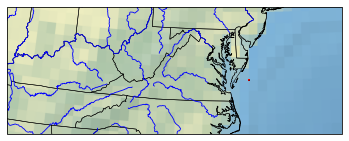

In [16]:
# set coordinate ref. systems
plot_crs =ccrs.LambertConformal(central_longitude = -75, central_latitude = 37.5)
data_crs =ccrs.PlateCarree()

#figures
fig = plt.figure(figsize = (6,6))

#axis
ax = plt.subplot(1,1,1, projection=plot_crs)
#left side,right side, bottom, top is the order below.
ax.set_extent([-88, -70, 35, 40], data_crs)

# polygon junk
#plt.plot([dfbuffer['Lon'],dfbuffer['Lat']], color = 'red', linewidth = 0.5, transform = plot_crs)
#ax.add_geometries([buffer_geom],crs =ccrs.LambertConformal(central_longitude = -75, central_latitude = 37.5),facecolor = 'r', edgecolor = 'red', alpha = 0.8)
#buffer_geom =Polygon(zip(dfbuffer['Lon'],dfbuffer['Lat']))
#basin_geom = Polygon(zip(dfbasin['Lon'],dfbasin['Lat']))

#background map
ax.stock_img()
ax.add_feature(cfeature.STATES, linewidth = 0.5)
ax.add_feature(cfeature.RIVERS, linewidth = 0.85, color = "b")
ax.add_feature(cfeature.COASTLINE, linewidth = 0.5)
ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.LAKES, color = 'b') # may not need the lakes

# incorporating the polygons into the map
bufferlon = dfbuffer['Lon']
bufferlat = dfbuffer['Lat']
return bufferlon, bufferlat

plt.show()